In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
dataset_train = pd.read_csv('/content/drive/My Drive/DL Projects/Occupancy-detection/datatraining.csv')

In [3]:
dataset_train.head(5)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [0]:
dataset_train = dataset_train.drop(labels = 'date', axis = 1)

In [6]:
print('training dataset shape : {}'.format(dataset_train.shape))

training dataset shape : (8143, 6)


In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
X = dataset_train.iloc[:,:5].values
y = dataset_train.iloc[:,5:6].values

In [0]:
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [10]:
X.shape

(8143, 5)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.2)

In [0]:
Y_train = np.expand_dims(Y_train, axis = 1)

In [14]:
X_train = np.expand_dims(X_train, axis = 2)
X_train.shape

(6514, 5, 1)

In [0]:
X_test = np.expand_dims(X_test, axis = 2)
Y_test = np.expand_dims(Y_test, axis = 1)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [0]:
model = Sequential()

model.add(LSTM(100, input_shape=(None,1)))
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [68]:
history = model.fit(X_train, Y_train, epochs = 15, validation_data=(X_test, Y_test), steps_per_epoch = X_train.shape[0])

Epoch 1/15
6514/6514 [==============================] - 24s 4ms/step - loss: 0.2265 - accuracy: 0.9028 - val_loss: 0.0806 - val_accuracy: 0.9699
Epoch 2/15
6514/6514 [==============================] - 23s 4ms/step - loss: 0.0667 - accuracy: 0.9785 - val_loss: 0.0421 - val_accuracy: 0.9896
Epoch 3/15
6514/6514 [==============================] - 24s 4ms/step - loss: 0.0470 - accuracy: 0.9846 - val_loss: 0.0401 - val_accuracy: 0.9840
Epoch 4/15
6514/6514 [==============================] - 24s 4ms/step - loss: 0.0403 - accuracy: 0.9857 - val_loss: 0.0398 - val_accuracy: 0.9847
Epoch 5/15
6514/6514 [==============================] - 24s 4ms/step - loss: 0.0416 - accuracy: 0.9857 - val_loss: 0.0325 - val_accuracy: 0.9896
Epoch 6/15
6514/6514 [==============================] - 23s 4ms/step - loss: 0.0377 - accuracy: 0.9868 - val_loss: 0.0396 - val_accuracy: 0.9840
Epoch 7/15
6514/6514 [==============================] - 23s 4ms/step - loss: 0.0389 - accuracy: 0.9874 - val_loss: 0.0384 - val_ac

In [0]:
model.save('occupancy-classification.h5')

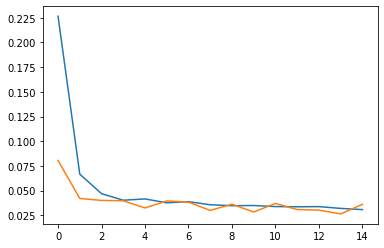

In [70]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

**LETS START WITH BASIC MATHS TO FIND ACCURACY FOR 1ST TEST DATASET**

In [0]:
dataset_test = pd.read_csv('/content/drive/My Drive/DL Projects/Occupancy-detection/datatest.csv')
dataset_test = dataset_test.drop(labels = 'date', axis = 1)

In [0]:
# taking values to predict
test = dataset_test.iloc[:,:5].values

In [0]:
# real occupancy which is either 1 or 0
real_occupancy = dataset_test.iloc[:,5:6].values

In [0]:
inputs = test

In [0]:
# feature scailing
inputs = sc.fit_transform(inputs)

In [0]:
# reshaping array to pass in model
inputs = np.reshape(inputs, (inputs.shape[0], inputs.shape[1], 1) )

In [77]:
inputs.shape

(2665, 5, 1)

In [0]:
# predictions
preds = model.predict(inputs)

In [79]:
preds

array([[0.70054525],
       [0.77159286],
       [0.81979483],
       ...,
       [0.9886225 ],
       [0.9882074 ],
       [0.98997366]], dtype=float32)

In [0]:
# just rounding off to get either 0 or 1
round_preds = np.round(preds)

**Lets See Confusion matrix**

In [0]:
from sklearn.metrics import confusion_matrix

In [82]:
cm = confusion_matrix(real_occupancy, round_preds)
cm

array([[1646,   47],
       [  47,  925]])

In [0]:
import seaborn as sns

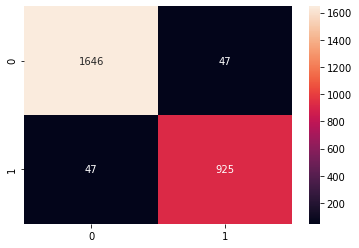

In [84]:
sns.heatmap(cm, annot=True, fmt = '.0f')

In [86]:
accuracy = (((1646+925) - (47+47)) / 2665) * 100
accuracy

92.94559099437149

**LETS START WITH BASIC MATHS TO FIND ACCURACY FOR 2ND TEST DATASET**

In [0]:
dataset_test2 = pd.read_csv('/content/drive/My Drive/DL Projects/Occupancy-detection/datatest2.csv')
dataset_test2 = dataset_test2.drop(labels = 'date', axis = 1)
# dataset_test2.head(4)

In [88]:
dataset_test2.shape

(9752, 6)

In [0]:
# taking values to predict
test2 = dataset_test2.iloc[:,:5].values

In [90]:
test2.shape

(9752, 5)

In [0]:
# real occupancy which is either 1 or 0
real_occupancy2 = dataset_test2.iloc[:,5:6].values

In [0]:
inputs2 = test2

In [0]:
# feature scailing
inputs2 = sc.fit_transform(inputs2)

In [0]:
# reshaping array to pass in model
inputs2 = np.reshape(inputs2, (inputs2.shape[0], inputs2.shape[1], 1) )

In [95]:
inputs2.shape

(9752, 5, 1)

In [0]:
# predictions
preds2 = model.predict(inputs2)

In [0]:
# just rounding off to get either 0 or 1
round_preds2 = np.round(preds2)

**Let's see confusion matrix**

In [0]:
from sklearn.metrics import confusion_matrix

In [99]:
cm = confusion_matrix(real_occupancy2, round_preds2)
cm

array([[7588,  115],
       [  85, 1964]])

In [0]:
import seaborn as sns

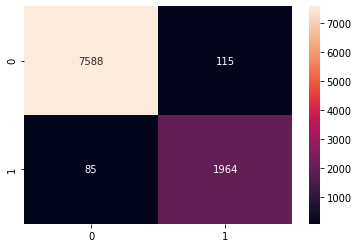

In [101]:
sns.heatmap(cm, annot=True, fmt = '.0f')

In [102]:
accuracy2 = (((7588+1964) - (115+85)) / 9752) * 100
accuracy2

95.89827727645611